In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Dropout
from keras.applications import densenet
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
train_DIR = '/content/drive/MyDrive/final_project_team8/현준/data/train_crop'

In [4]:
IM_WIDTH = 224

In [5]:
IM_HEIGHT = 224

In [6]:
train_datagen = ImageDataGenerator(
                        rescale = 1/255
                        # ,rotation_range = 0 # 360
                        # ,width_shift_range = 0 # 0.5
                        # ,height_shift_range = 0 # 0.5
                        # ,horizontal_flip=False # True
                        # ,vertical_flip = False #True
                    )

In [7]:
train_generator = train_datagen.flow_from_directory(
                        train_DIR,
                        target_size=(IM_HEIGHT, IM_WIDTH),
                        batch_size=1,
                        class_mode="binary",
                        shuffle=False
                    )

Found 8188 images belonging to 2 classes.


In [8]:
img,label = train_generator.next()

In [9]:
img

array([[[[0.29803923, 0.21568629, 0.10196079],
         [0.29803923, 0.21568629, 0.10196079],
         [0.43529415, 0.34117648, 0.24705884],
         ...,
         [0.59607846, 0.41176474, 0.24705884],
         [0.5529412 , 0.38431376, 0.20784315],
         [0.5529412 , 0.38431376, 0.20784315]],

        [[0.29803923, 0.21568629, 0.10196079],
         [0.29803923, 0.21568629, 0.10196079],
         [0.43529415, 0.34117648, 0.24705884],
         ...,
         [0.59607846, 0.41176474, 0.24705884],
         [0.5529412 , 0.38431376, 0.20784315],
         [0.5529412 , 0.38431376, 0.20784315]],

        [[0.29803923, 0.21568629, 0.10196079],
         [0.29803923, 0.21568629, 0.10196079],
         [0.43529415, 0.34117648, 0.24705884],
         ...,
         [0.59607846, 0.41176474, 0.24705884],
         [0.5529412 , 0.38431376, 0.20784315],
         [0.5529412 , 0.38431376, 0.20784315]],

        ...,

        [[0.3372549 , 0.227451  , 0.17254902],
         [0.3372549 , 0.227451  , 0.17254902]

In [10]:
label

array([0.], dtype=float32)

In [11]:
img.shape

(1, 224, 224, 3)

In [12]:
img[0].shape

(224, 224, 3)

In [13]:
test_DIR = '/content/drive/MyDrive/final_project_team8/현준/data/test_crop'

In [14]:
test_datagen = ImageDataGenerator(
                        rescale = 1/255
                        # ,rotation_range = 0 # 360
                        # ,width_shift_range = 0 # 0.5
                        # ,height_shift_range = 0 # 0.5
                        # ,horizontal_flip=False # True
                        # ,vertical_flip = False #True
                    )

In [15]:
test_generator = test_datagen.flow_from_directory(
                        test_DIR,
                        target_size=(IM_HEIGHT, IM_WIDTH),
                        batch_size=1,
                        class_mode="binary",
                        shuffle=False
                    )

Found 2049 images belonging to 2 classes.


# 모델 학습

In [16]:
model = Sequential()
model.add(
    tf.keras.applications.densenet.DenseNet121(
    include_top=False
    , weights='imagenet'
    , input_tensor=None
    , input_shape=(224,224,3)
    , pooling=None
    , classes=1000
    )
)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(1, activation='sigmoid'))

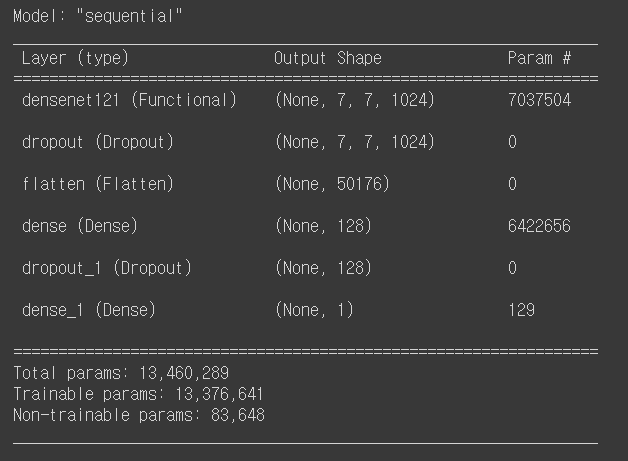

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 dropout (Dropout)           (None, 7, 7, 1024)        0         
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 128)               6422656   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 13,460,289
Trainable params: 13,376,641
No

In [18]:
model.compile(
                  loss="binary_crossentropy", 
                   optimizer=Adam(lr=1e-4),
                   metrics=["acc"]
              )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# checkpoint 활용

In [19]:
# checkpoint 만들기
checkpoint_path = '/content/drive/MyDrive/final_project_team8/숙희/check/tmp_checkpoint.ckpt'

checkpoint = ModelCheckpoint(
    filepath=checkpoint_path
    ,save_weights_only=True
    ,save_best_only=True
    ,monitor='loss' # val_loss
    ,verbose=1
)

In [20]:
# 이미지 학습
model.fit(
	train_generator
 	,batch_size=10
	,steps_per_epoch=10 # lr : 1e-4
	,epochs=1000
	,callbacks=[checkpoint]
)

Epoch 1/1000
10/10 [==============================] - ETA: 0s - loss: 0.5581 - acc: 0.8000
Epoch 00001: loss improved from inf to 0.55811, saving model to /content/drive/MyDrive/final_project_team8/숙희/check/tmp_checkpoint.ckpt
10/10 [==============================] - 19s 342ms/step - loss: 0.5581 - acc: 0.8000
Epoch 2/1000
10/10 [==============================] - ETA: 0s - loss: 1.3850 - acc: 0.7000
Epoch 00002: loss did not improve from 0.55811
10/10 [==============================] - 2s 247ms/step - loss: 1.3850 - acc: 0.7000
Epoch 3/1000
10/10 [==============================] - ETA: 0s - loss: 1.9937 - acc: 0.6000
Epoch 00003: loss did not improve from 0.55811
10/10 [==============================] - 2s 200ms/step - loss: 1.9937 - acc: 0.6000
Epoch 4/1000
10/10 [==============================] - ETA: 0s - loss: 5.2272 - acc: 0.6000
Epoch 00004: loss did not improve from 0.55811
10/10 [==============================] - 3s 280ms/step - loss: 5.2272 - acc: 0.6000
Epoch 5/1000
10/10 

In [21]:
model.load_weights(checkpoint_path)

In [22]:
# 모델 저장
model.save("/content/drive/MyDrive/final_project_team8/숙희/model/DenseNet121.h5")

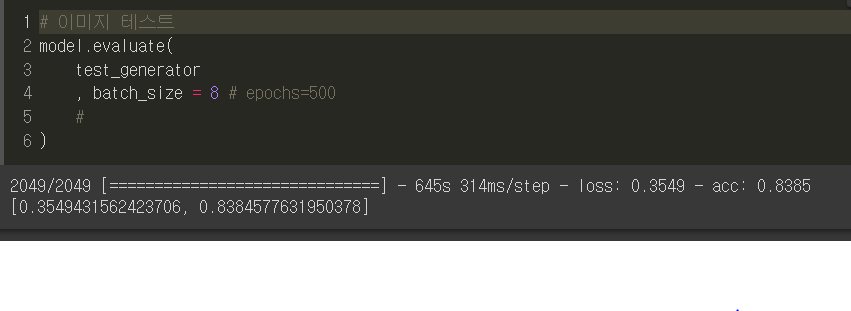

In [23]:
# 이미지 테스트
model.evaluate(
	test_generator
    , batch_size = 8 # epochs=500
    # 
)

2049/2049 [==============================] - 645s 314ms/step - loss: 0.3549 - acc: 0.8385


[0.3549431562423706, 0.8384577631950378]